In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def C_Conti1( S0, r, delta, sigma, K, CB, FV, coupon_rate, N, seed=None):           #S0 = initial Price, r = risk free, Delta = diviyield, sigma = Impl Vol, K = Coupon barrier
                                                                                    #CB = Call barrier, FV = Face value, coupon_rate = Quaterlu coupon rate, N = No of simulations
    obs_days = np.array([92, 183, 273, 365, 457, 547, 638, 730])
    obs_times = obs_days / 365.0                                                    #Observation Time for different Coupon days wrt Pricing Day
    steps = len(obs_times)
    df = np.exp(-r * obs_times)                                                    #Discount Factor for different observation days


    if seed is not None:
        np.random.seed(seed)

    payoffs = []                                                                    #List for Saving different Payoffs of all simulations

    for _ in range(N):
        S = np.zeros(steps + 1)
        S[0] = S0
        missed_coupons = 0
        PV = 0
        called = False

        for j in range(1, steps + 1):
            dt_j = obs_times[j - 1] - obs_times[j - 2] if j > 1 else obs_times[0]
            phi = np.random.normal()
            S[j] = S[j - 1] * np.exp((r - delta - 0.5 * sigma**2) * dt_j + sigma * np.sqrt(dt_j) * phi)   #Simulating Stock prices on observation days using Monte Carlo

            if j == 1:                                                          #Condition for 1st observation day  Coupon
                if S[j] >= K:
                    PV += FV * coupon_rate * df[j - 1]
                else:
                    missed_coupons += 1                                         #Total number of missed Coupons
            elif S[j] >= CB:                                                    #Condition for Observation day bw 2nd and 2nd last
                TC = FV * coupon_rate * (1 + missed_coupons)                    #TC = Total coupon
                PV += TC * df[j - 1]                                            #PV = Present Value of Coupon on the observation day in question
                PV += FV * df[j - 1]
                called = True
                break
            elif S[j] >= K:
                TC = FV * coupon_rate * (1 + missed_coupons)
                PV += TC * df[j - 1]
                missed_coupons = 0
            else:
                missed_coupons += 1

        if not called:                                                          #Condition for last observation day  which is also Valuation day
            Sf = S[-1]
            if Sf >= K:
                TC = FV * coupon_rate * (1 + missed_coupons)
                PV += TC * df[-1]
                PV += FV * df[-1]
            else:
                PV += (FV * (Sf / S0)) * df[-1]

        payoffs.append(PV)

    return np.mean(payoffs)                                                     #Mean of all Notes value Calculated using Monte carlo Simulations





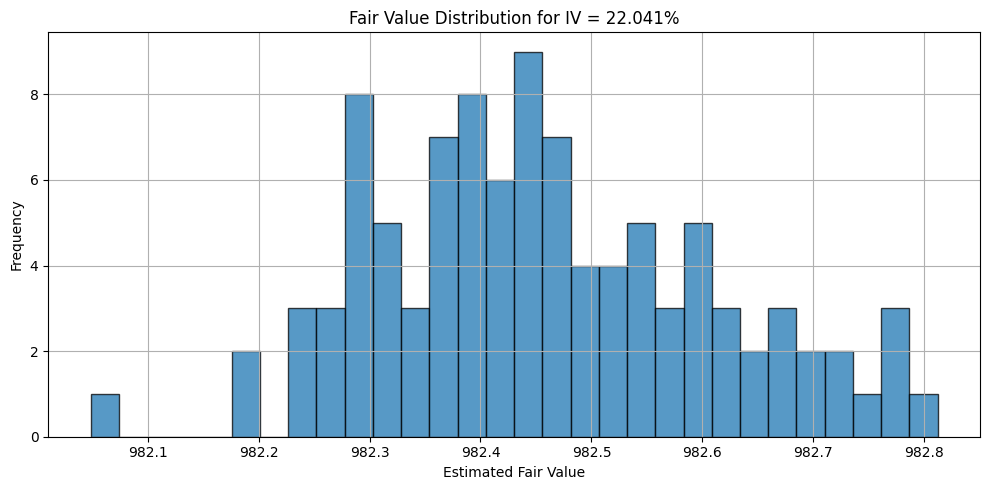

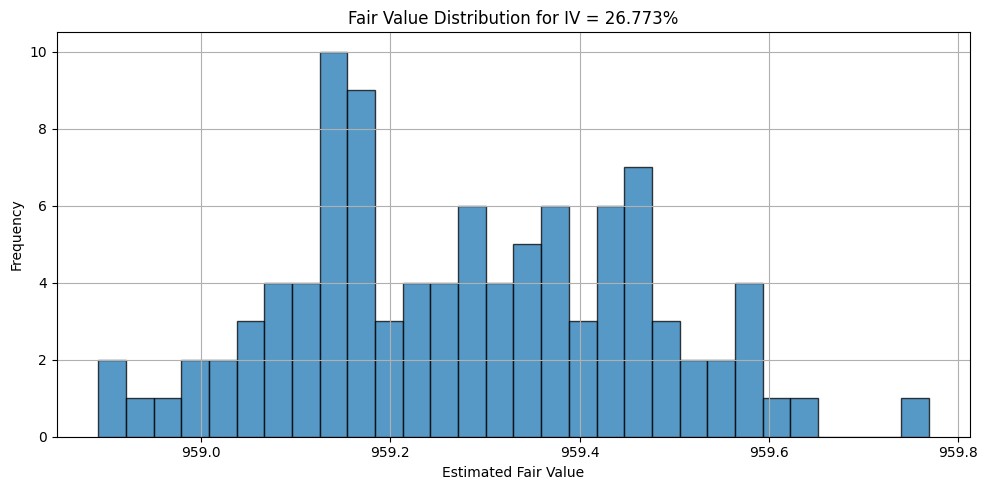

The Mean value of Product with IV of 22.041% at moneyness 100 is: 982.4554
The Standard Deviation of Product with IV of 22.041% at moneyness 100 is: 0.1813
The Mean value of Product with IV of 26.773% at moneyness 70 is: 959.2804
The Standard Deviation of Product with IV of 26.773% at moneyness 70 is: 0.1813
The Mean value of Product with IV of 22.041% and 26.773% at moneyness 100 and 70 is: 970.8679


In [14]:
distribution100 = []
distribution70 =[]

for seed in range(100):
  val100 = C_Conti1(521.89,0.03984, 0.02647,0.22041, 365.323,521.89,1000,0.0165,1000000,seed = seed)
  distribution100.append(val100)
  val70 = C_Conti1(521.89,0.03984, 0.02647,0.26773, 365.323,521.89,1000,0.0165,1000000,seed = seed)
  distribution70.append(val70)

mean_val100 = np.mean(distribution100)
std_val70 = np.std(distribution100)
mean_val70 = np.mean(distribution70)
std_val70 = np.std(distribution70)
Product_Value = np.mean([mean_val100, mean_val70])

# Plot
plt.figure(figsize=(10, 5))
plt.hist(distribution100, bins=30, edgecolor='k', alpha=0.75)
plt.title("Fair Value Distribution for IV = 22.041%")
plt.xlabel("Estimated Fair Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(distribution70, bins=30, edgecolor='k', alpha=0.75)
plt.title("Fair Value Distribution for IV = 26.773%")
plt.xlabel("Estimated Fair Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"The Mean value of Product with IV of 22.041% at moneyness 100 is: {mean_val100:.4f}")
print(f"The Standard Deviation of Product with IV of 22.041% at moneyness 100 is: {std_val70:.4f}")
print(f"The Mean value of Product with IV of 26.773% at moneyness 70 is: {mean_val70:.4f}")
print(f"The Standard Deviation of Product with IV of 26.773% at moneyness 70 is: {std_val70:.4f}")
print(f"The Mean value of Product with IV of 22.041% and 26.773% at moneyness 100 and 70 is: {Product_Value:.4f}")

In [12]:
IV = [.22041, 0.26773]       #Expiry day Vols ranging for Moneyness of 100,70
My = [100,70]

Value = []

for sigma in IV:
  val = C_Conti1(521.89, 0.03984, 0.02647,sigma, 365.323,521.89,1000,0.0165,1000000,42)
  Value.append(val)

for i in range(len(Value)):
  print(f" Moneyness = {My[i]}, Coupon Value = {Value[i]:.4f}")

average = np.mean(Value)

print (f"Average Coupon Value = {average:.4f}")



 Moneyness = 100, Coupon Value = 982.4508
 Moneyness = 70, Coupon Value = 959.1655
Average Coupon Value = 970.8081


 Moneyness = 100 ,Coupon Day = 92, Coupon Day IV = 0.21329, Coupon Value = 985.9043
 Moneyness = 100 ,Coupon Day = 183, Coupon Day IV = 0.21684, Coupon Value = 984.1906
 Moneyness = 100 ,Coupon Day = 273, Coupon Day IV = 0.21522, Coupon Value = 984.9662
 Moneyness = 100 ,Coupon Day = 365, Coupon Day IV = 0.21349, Coupon Value = 985.8102
 Moneyness = 100 ,Coupon Day = 457, Coupon Day IV = 0.21379, Coupon Value = 985.6538
 Moneyness = 100 ,Coupon Day = 547, Coupon Day IV = 0.21797, Coupon Value = 983.6217
 Moneyness = 100 ,Coupon Day = 638, Coupon Day IV = 0.22101, Coupon Value = 982.1597
 Moneyness = 100 ,Coupon Day = 730, Coupon Day IV = 0.22041, Coupon Value = 982.4508
 Moneyness = 70 ,Coupon Day = 92, Coupon Day IV = 0.38991, Coupon Value = 903.3292
 Moneyness = 70 ,Coupon Day = 183, Coupon Day IV = 0.31096, Coupon Value = 938.5589
 Moneyness = 70 ,Coupon Day = 273, Coupon Day IV = 0.28606, Coupon Value = 950.2858
 Moneyness = 70 ,Coupon Day = 365, Coupon Day IV = 0.27472, Coupon Val

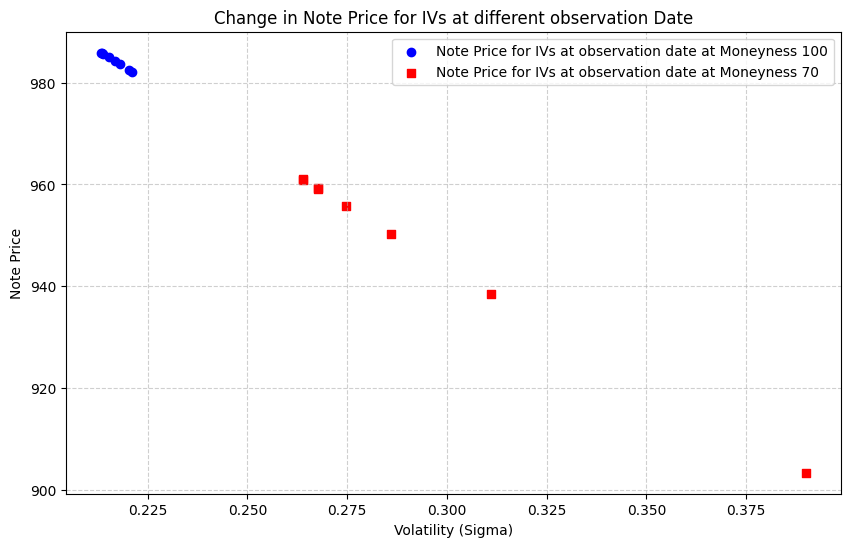

In [13]:
IV100 = [0.21329,0.21684, 0.21522, 0.21349, 0.21379, 0.21797, 0.22101, 0.22041 ]           #Vols for Moneyness 100 with Pricing and different Coupon dates
IV70 = [0.38991, 0.31096, 0.28606, 0.27472, 0.26763, 0.26402, 0.26396, 0.26773]           #Vols for Moneyness 70 with Pricing and different Coupon dates
Days = [92, 183, 273, 365, 457, 547, 638, 730]
Value100 = []
Value70 = []

for sigma in IV100:
  val100 = C_Conti1(521.89, 0.03984, 0.02647, sigma, 365.323, 521.89, 1000, 0.0165,1000000,42)
  Value100.append(val100)

for sigma in IV70:
  val70 = C_Conti1(521.89, 0.03984, 0.02647, sigma, 365.323, 521.89, 1000, 0.0165,1000000,42)
  Value70.append(val70)

for i in range(len(Value100)):
  print(f" Moneyness = {100} ,Coupon Day = {Days[i]}, Coupon Day IV = {IV100[i]}, Coupon Value = {Value100[i]:.4f}")

for i in range(len(Value70)):
  print(f" Moneyness = {70} ,Coupon Day = {Days[i]}, Coupon Day IV = {IV70[i]}, Coupon Value = {Value70[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(IV100, Value100, color = 'b', label='Note Price for IVs at observation date at Moneyness 100', marker='o')
plt.scatter(IV70, Value70, color = 'r', label='Note Price for IVs at observation date at Moneyness 70', marker='s')
plt.xlabel('Volatility (Sigma)')
plt.ylabel('Note Price')
plt.title('Change in Note Price for IVs at different observation Date')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()